# Data Science Framework
1. Define the Problem
2. Gather Data
3. Prepare Data 
4. Perform Statistical Analysis
5. Model Data
6. Validate
7. Optimize

# Load Libraries

In [3]:
# System modules
import sys
import random
import time
import datetime 

# Data Analysis and Modeling modules
import sklearn
import pandas as pd
import numpy as np
import scipy as sp

In [4]:
# modeling algorithms
from sklearn import (svm, 
                     tree, 
                     linear_model, 
                     neighbors, 
                     naive_bayes, 
                     ensemble, 
                     discriminant_analysis, 
                     gaussian_process)

# import xgboost

# helper methods
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [5]:
# Data Visualization modules
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Visualization Configuration
# for jupyter notebook
%matplotlib inline 
style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Understanding Data

In [6]:
train_data_raw = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [5]:
train_data_raw.head(15)
# train_data_raw.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [6]:
test_data.head()
test_data.tail()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479
884261,884261,2003-01-01 00:01:00,Wednesday,TARAVAL,1500 Block of SLOAT BL,-122.489714,37.733950


## Columns
- Dates: date it occured
- Category: type of crime
- Description: nature of crime
- DayOfWeek: monday, tuesday, wednesday, friday, satuday, or sunday
- PdDistric: general place where crime occured
- Resolution: how the crime ended
- Address: play of where the crime occcured
- X, Y: latitue and longiture positions 

In [7]:
# Create a copy of the data to work on
train_data = train_data_raw.copy(deep=True)
data_cleaner = [train_data, test_data]

In [8]:
# Show the data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None


In [9]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB
None


# 4 C's
- correcting
- completing
- creating
- converting

In [10]:
# look for null values in training dataset
print("Train Columns with null values:")
print(train_data.isnull().sum())

Train Columns with null values:
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [11]:
# Look for null values in testing dataset
print("Test Columns with null vales:")
print(test_data.isnull().sum())

Test Columns with null vales:
Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64


In [12]:
print(train_data.describe()) # more info: include='all' as param

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


## Clean Data
- there are no null fileds so no null value needs to be filled
- look for columns that will not give any information

__Todo__
- __date__:
    - separate date filed with: year, month, day, hour, minutes, (seconds) 
    - or bin data
        - bin with season(summer autum winter spring)
        - easier bin based on month
- __day__:
    - make day field into numbers w/ LabelEncoder() and pd.dummy() 
    - maybe don't need due to date field
    - or bin data: 
        - make into weekend/weekday columns
- __PdDistric__:
    - LabelEncoder() and pd.dummy()
- __Address__:
    - maybe drop due to X,Y
    - maybe look at crimes that occured in the same area, they are probably linked
- __X, Y__:
    - do edit needed
    
 ## Feature Engineering
 - look at crimes that occured on the same day
 - check if crime occured at day or night
 - look at crimes that occured close to each other 
     - check if they occured in same police distric
     - check if they occured within some threshold of X, Y
     - check if they occured within same address
 - look at crimes that occured on same day and close to each other
 - create feature for differnt times of year, months, and day
     - _year_: just record year number. 
     - _month_: summer, autumn, winter, spring
     - _week-day_: column for each day of week (just a dummy var)
     - _day_: morning, eveining, afternoon, night
     - _special day_: easter, christmas, ... 
      
         
    
 ## Targets
 - catergory, resolution, description are not provided in the testing file; therefore we will look at out trining set for those values. 
 - __Category__: 
     - separate them with labelEncoder() and pd.dummy()
     - find the severity of crime
 - __Description__:
     - dont worry about, explained with category
 - __Resolution__:
     - check if there is alot of data that is "None"
         - if so then probably don't use 
    

# Define our Targets and Features

In [13]:
# Target = ['Category', 'Resolution']
# print(train_data[Target].head())

In [9]:
# modify Dates column
for dataset in data_cleaner:
    # split by '-' to get year, month, and day
    dataset['List_Date'] = dataset['Dates'].map(lambda x: x.split('-'))
    dataset['Year'] = dataset['List_Date'].map(lambda x: x[0])
    dataset['Month'] = dataset['List_Date'].map(lambda x: x[1])
    dataset['Day_Time'] = dataset['List_Date'].map(lambda x: x[2])
    # split by ' ' to separate date and time
    dataset['Day_Time_List'] = dataset['Day_Time'].map(lambda x: x.split(' '))
    dataset['Day'] = dataset['Day_Time_List'].map(lambda x: x[0])
    dataset['Time_List'] = dataset['Day_Time_List'].map(lambda x: x[1])
    # split by ':' to get hour, minute, second
    dataset['Time_List'] = dataset['Time_List'].map(lambda x: x.split(':'))
    dataset['Hour'] = dataset['Time_List'].map(lambda x: x[0])
    dataset['Minute'] = dataset['Time_List'].map(lambda x: x[1])
    dataset['Second'] = dataset['Time_List'].map(lambda x: x[2])
    

In [10]:
date_time_columns = ['Year','Month', 'Day', 'Hour', 'Minute', 'Second']
print(train_data[date_time_columns].head(10))
print(train_data[date_time_columns].tail(10))

   Year Month Day Hour Minute Second
0  2015    05  13   23     53     00
1  2015    05  13   23     53     00
2  2015    05  13   23     33     00
3  2015    05  13   23     30     00
4  2015    05  13   23     30     00
5  2015    05  13   23     30     00
6  2015    05  13   23     30     00
7  2015    05  13   23     30     00
8  2015    05  13   23     00     00
9  2015    05  13   23     00     00
        Year Month Day Hour Minute Second
878039  2003    01  06   00     40     00
878040  2003    01  06   00     33     00
878041  2003    01  06   00     31     00
878042  2003    01  06   00     20     00
878043  2003    01  06   00     20     00
878044  2003    01  06   00     15     00
878045  2003    01  06   00     01     00
878046  2003    01  06   00     01     00
878047  2003    01  06   00     01     00
878048  2003    01  06   00     01     00


In [11]:
day = datetime.datetime(2018, 11, 20)
day.month
# check if workday, holiday, daytime
for dataset in data_cleaner:
    dataset['Workhour'] = dataset['Hour'].map(lambda x: x in range(9, 17))

In [12]:
# print(train_data['Workhour'].tail())
from pandas.tseries.holiday import USFederalHolidayCalendar
days_off = USFederalHolidayCalendar().holidays(start='2003-01-01', end='2015-05-31').to_pydatetime()
# print(days_off)
# print(days_off[0])
year = int(train_data['Year'][0])
month= int(train_data['Month'][0])
day= int(train_data['Day'][0])
hour= int(train_data['Hour'][0])
minute= int(train_data['Minute'][0])
second= int(train_data['Second'][0])
# print(train_data[date_time_columns].apply(lambda x : datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']), int(x['Hour']), int(x['Minute']), int(x['Second'])) in days_off, axis=1))
# print(datetime.datetime(year, month, day, hour, minute, second) in days_off)
# print(datetime.datetime(2010, 11, 20, 11, 12, 23) in days_off)

In [13]:
for dataset in data_cleaner:
    dataset['intYear'] = dataset['Year'].map(lambda x: int(x))
    dataset['intMonth'] = dataset['Month'].map(lambda x: int(x))
    dataset['intDay'] = dataset['Day'].map(lambda x: int(x))
    dataset['intHour'] = dataset['Hour'].map(lambda x: int(x))
    dataset['intMinute'] = dataset['Minute'].map(lambda x: int(x))
    dataset['intSecond'] = dataset['Second'].map(lambda x: int(x))

In [14]:
print(type(dataset['intYear'][0]))

<class 'numpy.int64'>


In [15]:
int_date_clos = ['intYear', 'intMonth', 'intDay', 'intHour', 'intMinute', 'intSecond']
for dataset in data_cleaner:
    dataset['DateTimeModuel'] = train_data[int_date_clos].apply(lambda x: datetime.datetime(x['intYear'], x['intMonth'], x['intDay'], x['intHour'], x['intMinute'], x['intSecond']), axis=1)
    print('finished one')

finished one
finished one


In [16]:
print(type(dataset['DateTimeModuel'][0]))

<class 'pandas._libs.tslib.Timestamp'>


In [17]:
for dataset in data_cleaner:
    # check if a datetime object is in the days_off list
    dataset['isHoliday'] = train_data['DateTimeModuel'].map(lambda x : x in days_off)
    print('finished one')

finished one
finished one


In [18]:
# train_data['Category'].head()
# train_data.drop('List_Date', axis=1, inplace=True)
# train_data.drop('List_Date', axis=1, inplace=True)
for dataset in data_cleaner:
    dataset.drop('intYear', axis=1, inplace=True)
    dataset.drop('intMonth', axis=1, inplace=True)
    dataset.drop('intDay', axis=1, inplace=True)
    dataset.drop('intHour', axis=1, inplace=True)
    dataset.drop('intMinute', axis=1, inplace=True)
    dataset.drop('intSecond', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 22 columns):
Dates             878049 non-null object
Category          878049 non-null object
Descript          878049 non-null object
DayOfWeek         878049 non-null object
PdDistrict        878049 non-null object
Resolution        878049 non-null object
Address           878049 non-null object
X                 878049 non-null float64
Y                 878049 non-null float64
List_Date         878049 non-null object
Year              878049 non-null object
Month             878049 non-null object
Day_Time          878049 non-null object
Day_Time_List     878049 non-null object
Day               878049 non-null object
Time_List         878049 non-null object
Hour              878049 non-null object
Minute            878049 non-null object
Second            878049 non-null object
Workhour          878049 non-null bool
DateTimeModuel    878049 non-null datetime64[ns]
isHoliday         87

In [19]:
print(train_data['isHoliday'].head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: isHoliday, dtype: bool


In [20]:
# bin data
for dataset in data_cleaner:
    dataset['YearBin'] = pd.cut(dataset['Year'].astype(int),13)
    dataset['MonthBin'] = pd.cut(dataset['Month'].astype(int),12)
    dataset['DayBin'] = pd.cut(dataset['Day'].astype(int),31)
    # hour might be usefor to check the time of day crime occurs, 
    # minute and second are not useful to specific
    dataset['HourBin'] = pd.cut(dataset['Hour'].astype(int),24)
    
    # bin longiture, and latitude
    dataset['XBin'] = pd.qcut(dataset['X'], 5)
    dataset['YBin'] = pd.qcut(dataset['Y'], 5)
                                       
                                       

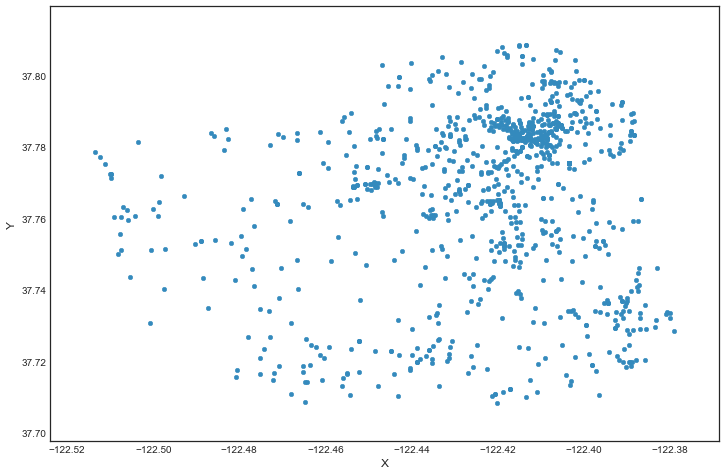

In [35]:
train_data[train_data['X'] < 200].sample(1000).plot.scatter(x='X', y='Y')

In [38]:
# print(train_data[['Year', 'YearBin', 'Month', 'MonthBin', 'Day', 'DayBin', 'X', 'XBin', 'Y', 'YBin']].head(10))
# print(train_data[['Year', 'YearBin', 'Month', 'MonthBin', 'Day', 'DayBin', 'X', 'XBin', 'Y', 'YBin']].tail(10))
# print(train_data.info())

In [39]:
weekday = ['Monday', 'Tuesday','Wednesday', 'Thursday','Friday']
for dataset in data_cleaner:
    # check if its a weekday or not 
    dataset['isWeekday'] = dataset['DayOfWeek'].map(lambda x: x in weekday)

In [40]:
print(train_data[['DayOfWeek', 'isWeekday']].head(20))
print(train_data[['DayOfWeek', 'isWeekday']].tail(20))

    DayOfWeek  isWeekday
0   Wednesday       True
1   Wednesday       True
2   Wednesday       True
3   Wednesday       True
4   Wednesday       True
5   Wednesday       True
6   Wednesday       True
7   Wednesday       True
8   Wednesday       True
9   Wednesday       True
10  Wednesday       True
11  Wednesday       True
12  Wednesday       True
13  Wednesday       True
14  Wednesday       True
15  Wednesday       True
16  Wednesday       True
17  Wednesday       True
18  Wednesday       True
19  Wednesday       True
       DayOfWeek  isWeekday
878029    Monday       True
878030    Monday       True
878031    Monday       True
878032    Monday       True
878033    Monday       True
878034    Monday       True
878035    Monday       True
878036    Monday       True
878037    Monday       True
878038    Monday       True
878039    Monday       True
878040    Monday       True
878041    Monday       True
878042    Monday       True
878043    Monday       True
878044    Monday       True

In [32]:
# create a counter for crimes that occurred on same day
# print(train_data['Year'].value_counts())
# print(train_data['Month'].value_counts())
# print(train_data['Day'].value_counts())

In [41]:
for dataset in data_cleaner:
    dataset['Date_Crime_Count'] = dataset['Year']+'-'+dataset['Month']+'-'+dataset['Day']
    dict_crime_count = dataset['Date_Crime_Count'].value_counts().to_dict()
    dataset['Same_Date_Crime_Counter'] = dataset['Date_Crime_Count'].map(lambda x: dict_crime_count[x])

In [43]:
# print(train_data.head(10))
# print(train_data.info())

# Covert Formats

In [44]:
label = LabelEncoder()

In [45]:
for dataset in data_cleaner:
    dataset['Address_Code'] = label.fit_transform(dataset['Address'])
    dataset['isWeekday_Code'] = label.fit_transform(dataset['isWeekday'])
    dataset['Address_Code'] = label.fit_transform(dataset['Address'])
    dataset['Workhour_Code'] = label.fit_transform(dataset['Workhour'])
    dataset['isHoliday_Code'] = label.fit_transform(dataset['isHoliday'])

In [37]:
# labeled_data = ['Address_Code','isWeekday_Code','Address_Code','Workhour_Code','isHoliday_Code']
# print(train_data[labeled_data])

In [46]:
for dataset in data_cleaner:
    dataset['Year'] = dataset['Year'].map(lambda x: int(x))
    dataset['Month'] = dataset['Month'].map(lambda x: int(x))
    dataset['Day'] = dataset['Day'].map(lambda x: int(x))
    dataset['Hour'] = dataset['Hour'].map(lambda x: int(x))
    dataset['Minute'] = dataset['Minute'].map(lambda x: int(x))
    dataset['Second'] = dataset['Second'].map(lambda x: int(x))
    dataset.drop('Day_Time', axis=1, inplace=True)
    dataset.drop('Time_List', axis=1, inplace=True)
    dataset.drop('Day_Time_List', axis=1, inplace=True)
    dataset.drop('Date_Crime_Count', axis=1, inplace=True)
    
    

In [47]:
# train_data['Same_Date_Crime_Counter'].head()

In [48]:
# print(train_data.info())

In [50]:
train_data['Category_Code'] = label.fit_transform(train_data['Category'])
# print(type(train_data['Category_Code'].tolist()))

In [51]:
# train_data['Category'].value_counts()

In [52]:
Target = ['Category']

In [53]:
Target_dummy = pd.get_dummies(train_data['Category'])

In [55]:
# print(Target_dummy.head())

In [65]:
data_x = ['Year', 'Month', 'Day', 'Hour', 'Address_Code', 
          'isWeekday_Code', 'isHoliday_Code', 'Workhour_Code', 
          'Same_Date_Crime_Counter']
data_x_bin = ['YearBin', 'MonthBin', 'DayBin']
# data_x_dummy = pd.get_dummies(train_data[data_x])
# data_xy = Target + data_x
# print(data_x_dummy.head())

In [57]:
# train_data.info()
data_x_dummy = pd.get_dummies(train_data[data_x])

## Dummy data

In [58]:
days_dummy = pd.get_dummies(train_data["DayOfWeek"])
district_dummy = pd.get_dummies(dataset['PdDistrict'])

In [59]:
# print(data_x_dummy.shape)
# print(days_dummy)

# Statistics

In [60]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Heatmap', y=1.05, size=15)

In [61]:
# print(train_data.info())

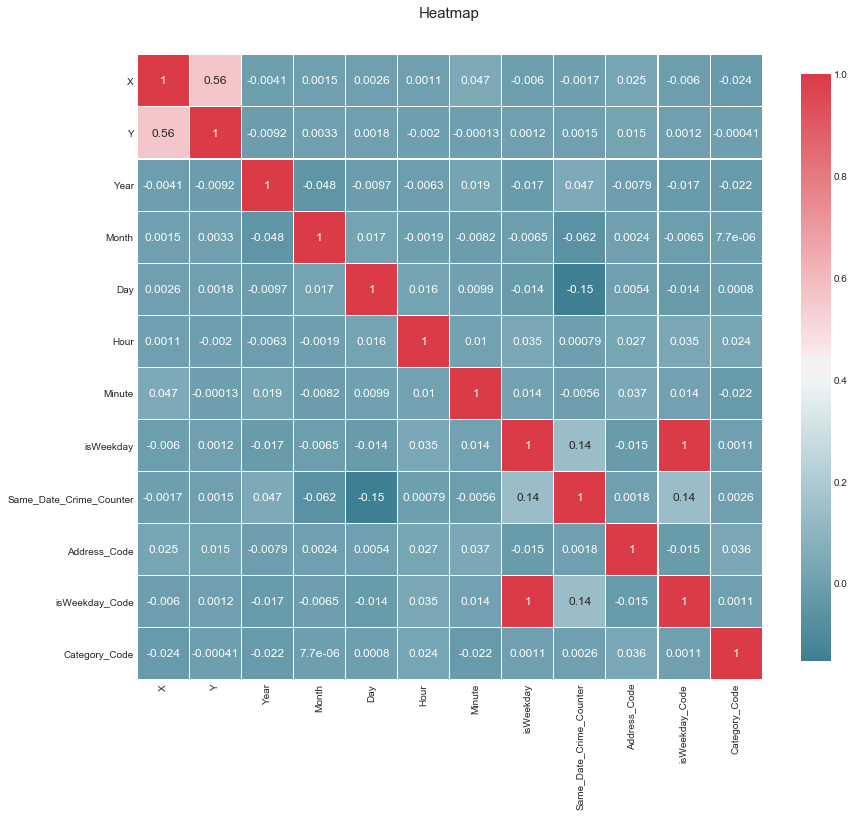

In [62]:
correlation_heatmap(train_data.drop(['Workhour', 'isHoliday', 'Workhour_Code', 'Second', 'isHoliday_Code'], axis=1))
# plt.savefig('Heatmap_of_Features.png')

In [140]:
# sns.barplot(x = 'isWeekday', y = 'Same_Date_Crime_Counter', data=train_data, ax = qaxis[0])
# axis1.set_title('Weekend day crimes')

# sns.barplot(x = 'isHoliday', y = 'Same_Date_Crime_Counter', data=train_data, ax = qaxis[1])
# # axis2.set_title('Weekend day crimes')

In [141]:
# plt.plot()

# Machine Learning

In [63]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
]


## Train/Fit the Models

## Train/Test Split
- have plenty of data no need for cross validation

In [66]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(train_data[data_x], train_data['Category_Code'], random_state=0)
print('Total shape:', train_data.shape,  Target_dummy.shape)
print('Train shape:', train_X.shape, train_y.shape)
print('Test shape:', test_X.shape, test_y.shape)

Total shape: (878049, 32) (878049, 39)
Train shape: (658536, 9) (658536,)
Test shape: (219513, 9) (219513,)


In [67]:
test_clf = MLA[11]
print("alg:", test_clf.__class__.__name__)
# test_clf.fit(train_X, train_y)
# print(test_clf.score(test_X, test_y))

alg: BernoulliNB


In [68]:
test_clf.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [204]:
for model in MLA:
    print('alg:', model.__class__.__name__)
    model.fit(train_X, train_y)
    print('train score', model.score(train_X, train_y))
    print("test score:", model.score(test_X, test_y))
    predictions = model.predict_proba(test_X)
    print('log loss:', metrics.log_loss(test_y, predictions))

alg: AdaBoostClassifier


KeyboardInterrupt: 

## Log Loss / Score

In [69]:
predictions = test_clf.predict_proba(test_X)
# metrics.log_loss(Target, )

In [70]:
print(metrics.log_loss(test_y, predictions))
print(test_clf.score(test_X, test_y))
print(test_clf.score(train_X, train_y))

2.6749621635068026
0.19866249379307832
0.20065721539900627


# Submit Test Data

In [192]:
categories = [c for c in train_data['Category'].unique()]
categories = sorted(categories)

In [193]:
# print(categories)
test_submission = test_data.copy(deep=True)

In [194]:
for category in categories:
    test_submission[category] = test_submission['X'].map(lambda x: 0)
test_submission['WARRANTS'] = test_submission['X'].map(lambda x: 1)

In [195]:
print(test_submission.tail())
# 884262

            Id                Dates  DayOfWeek PdDistrict  \
884257  884257  2003-01-01 00:01:00  Wednesday    MISSION   
884258  884258  2003-01-01 00:01:00  Wednesday   NORTHERN   
884259  884259  2003-01-01 00:01:00  Wednesday  INGLESIDE   
884260  884260  2003-01-01 00:01:00  Wednesday    BAYVIEW   
884261  884261  2003-01-01 00:01:00  Wednesday    TARAVAL   

                            Address           X          Y  \
884257      2600 Block of BRYANT ST -122.408983  37.751987   
884258  1900 Block of WASHINGTON ST -122.425342  37.792681   
884259     5500 Block of MISSION ST -122.445418  37.712075   
884260      1500 Block of HUDSON AV -122.387394  37.739479   
884261       1500 Block of SLOAT BL -122.489714  37.733950   

                      List_Date  Year  Month     ...      \
884257  [2003, 01, 01 00:01:00]  2003      1     ...       
884258  [2003, 01, 01 00:01:00]  2003      1     ...       
884259  [2003, 01, 01 00:01:00]  2003      1     ...       
884260  [2003, 01, 0

In [203]:
droping_this_col = []
for col in list(test_submission):
    if col not in categories:
        droping_this_col.append(col)
print(droping_this_col)

['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'List_Date', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Workhour', 'DateTimeModuel', 'isHoliday', 'YearBin', 'MonthBin', 'DayBin', 'HourBin', 'XBin', 'YBin', 'isWeekday', 'Same_Date_Crime_Counter', 'Address_Code', 'isWeekday_Code', 'Workhour_Code', 'isHoliday_Code']


In [204]:
test_submission.drop(droping_this_col, axis=1, inplace=True)

In [205]:
test_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 39 columns):
ARSON                          884262 non-null int64
ASSAULT                        884262 non-null int64
BAD CHECKS                     884262 non-null int64
BRIBERY                        884262 non-null int64
BURGLARY                       884262 non-null int64
DISORDERLY CONDUCT             884262 non-null int64
DRIVING UNDER THE INFLUENCE    884262 non-null int64
DRUG/NARCOTIC                  884262 non-null int64
DRUNKENNESS                    884262 non-null int64
EMBEZZLEMENT                   884262 non-null int64
EXTORTION                      884262 non-null int64
FAMILY OFFENSES                884262 non-null int64
FORGERY/COUNTERFEITING         884262 non-null int64
FRAUD                          884262 non-null int64
GAMBLING                       884262 non-null int64
KIDNAPPING                     884262 non-null int64
LARCENY/THEFT                  884262 non

In [207]:
test_submission.to_csv('testing_warrants.csv')